# Импорт библиотек

In [304]:
import pandas as pd
import numpy as np

# Графики
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from imblearn.over_sampling import SMOTE

from collections import Counter

# Импорт классификаторов
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Разделение датасета и оценка качества моделей
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Импорт F1 метрики
from sklearn.metrics import f1_score

# Вывод фото
from IPython.display import Image

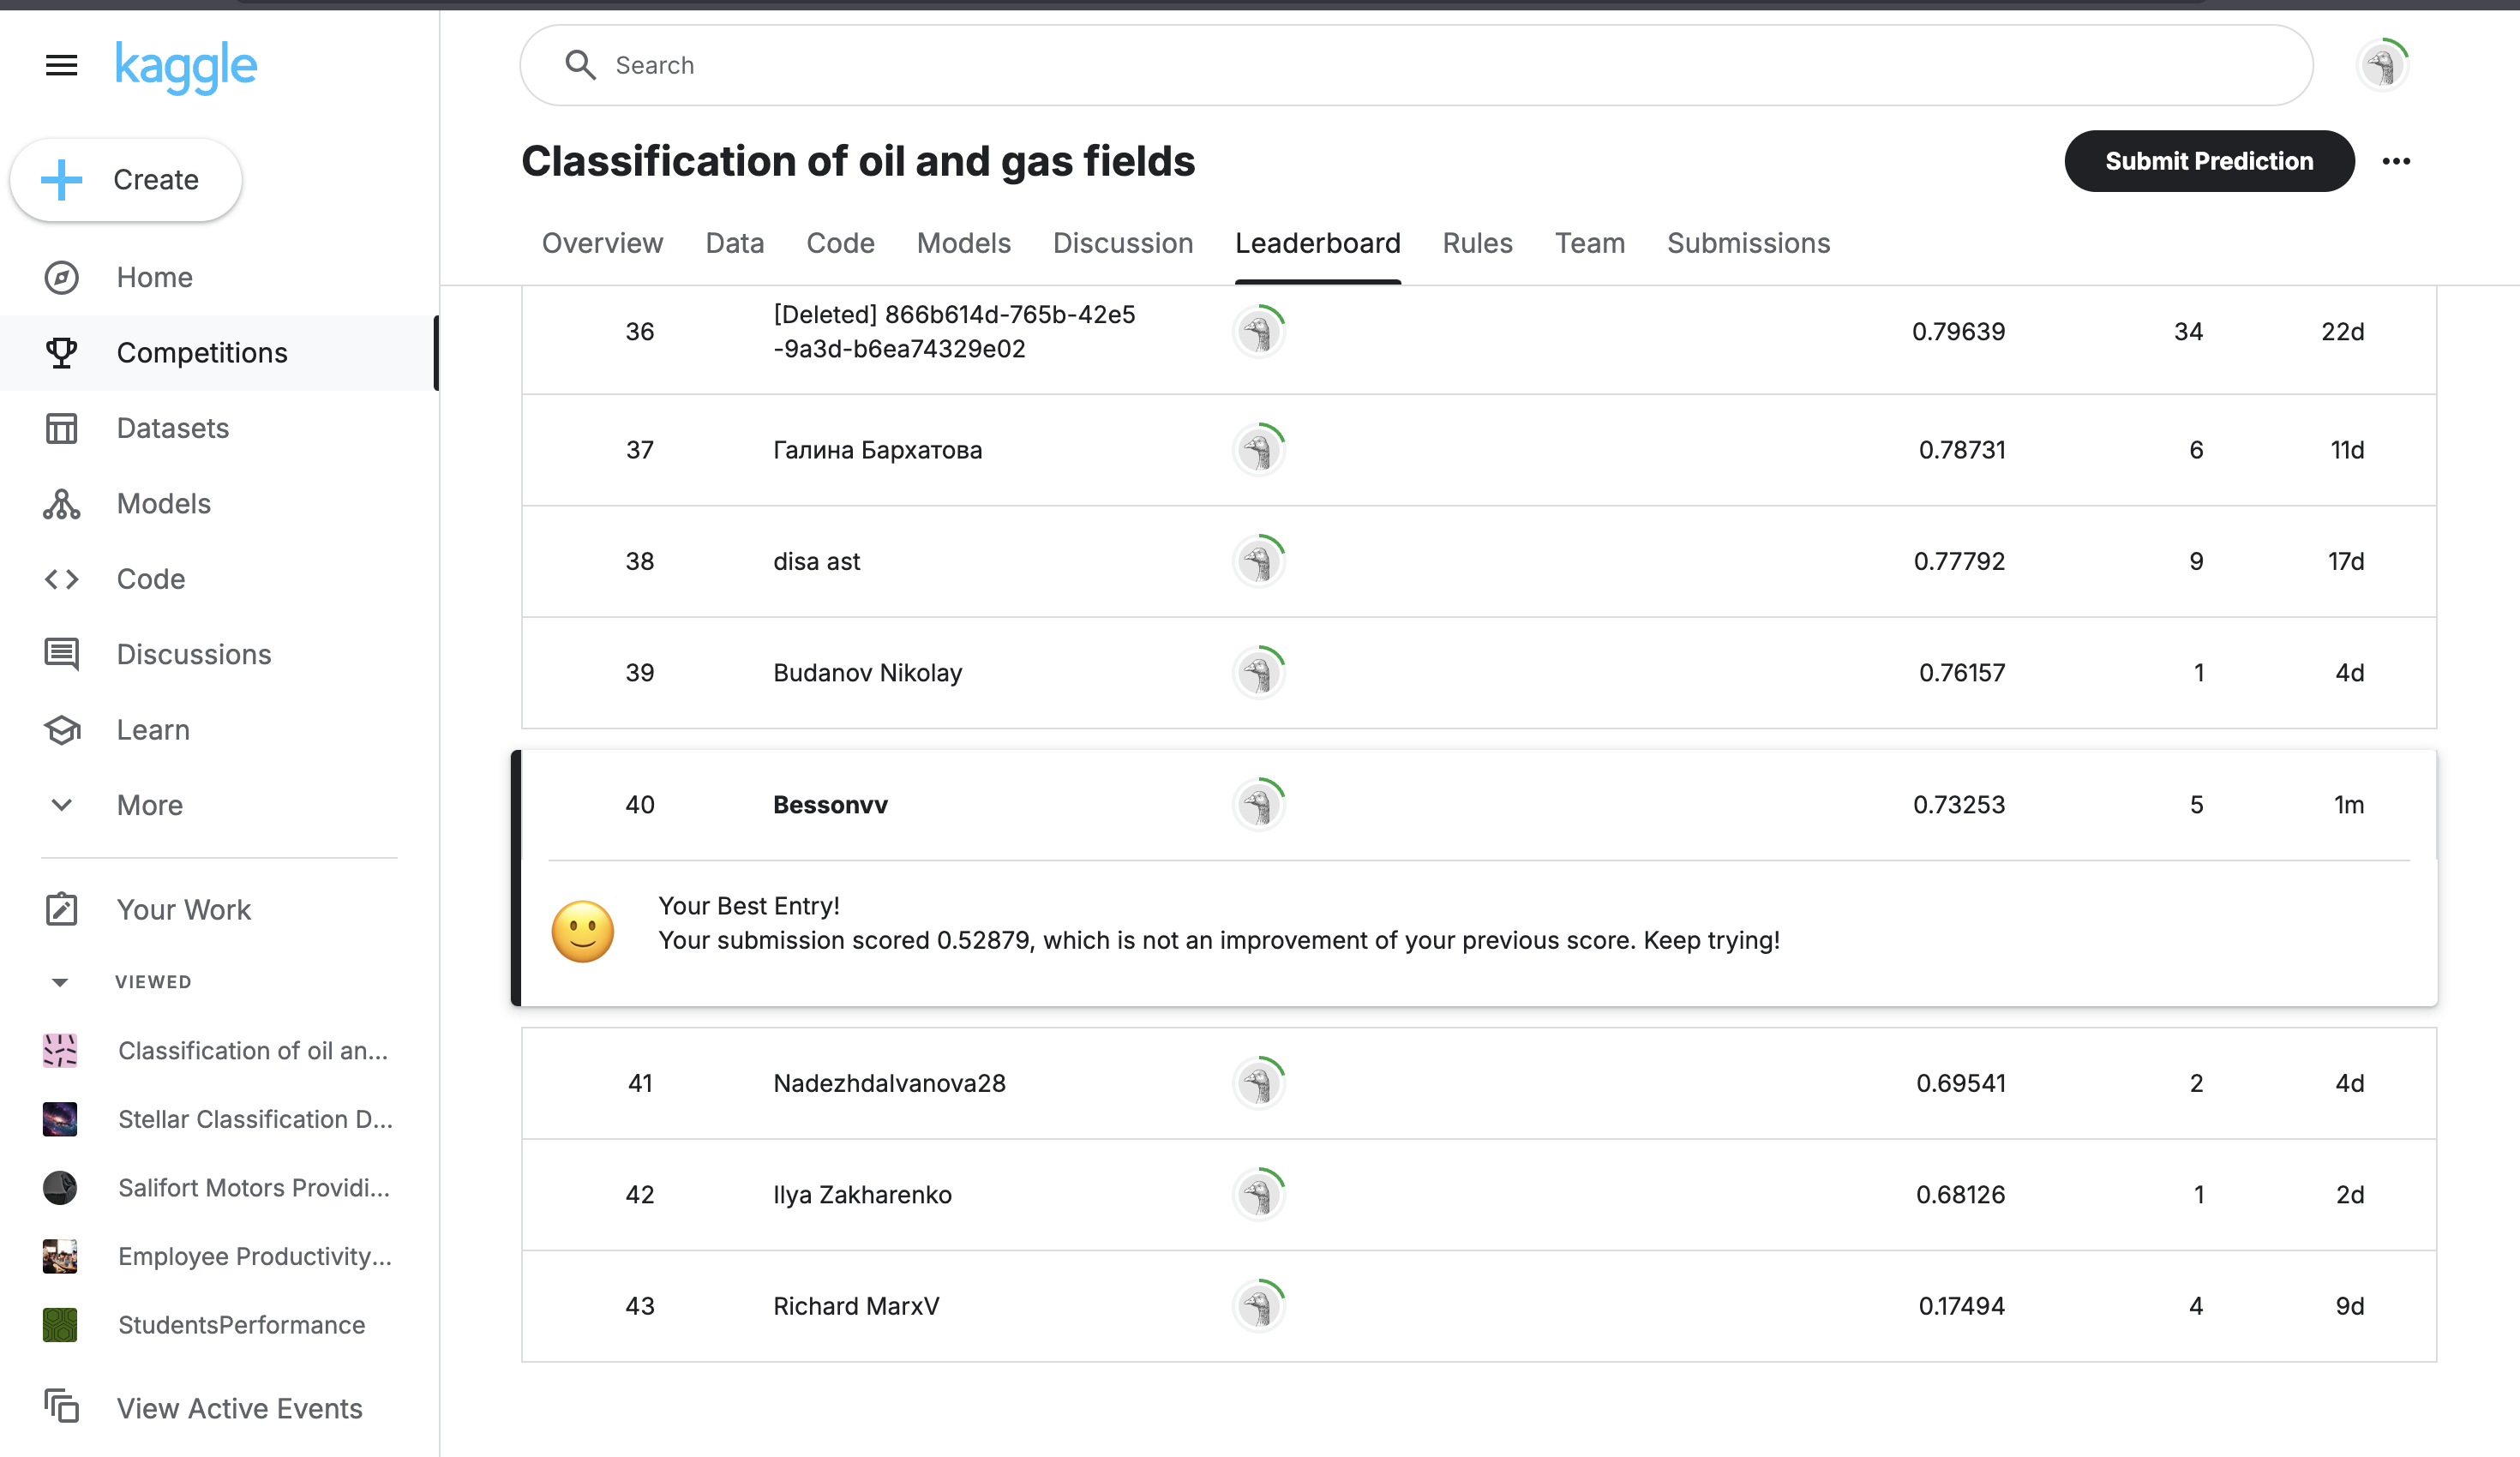

In [305]:
Image('/Users/bessonv/Skillfactory/Анализ данных в Pandas/Снимок экрана 2025-04-04 в 16.27.31.png')

# 1 Исследование и анализ датасета.
Каждое месторождение обладает 19 параметрами:

    Field name - название месторождения
    Reservoir unit - юнит месторождения
    Country - страна расположения
    Region - регион расположения
    Basin name - название бассейна пород
    Tectonic regime - тектонический режим
    Latitude - широта
    Longitude - долгота
    Operator company - название компании
    Onshore or oﬀshore - целевая переменная (ONSHORE - 1, OFFSHORE - 0, ONSHORE-OFFSHORE - 2)
    Hydrocarbon type (main) - тип углеводорода
    Reservoir status (current) - статус месторождения
    Structural setting - структурные свойства
    Depth (top reservoir ft TVD) - глубина
    Reservoir period - литологический период
    Lithology (main) - литология
    Thickness (gross average ft) - общая толщина
    Thickness (net pay average ft) - эффективная толщина
    Porosity (matrix average 20. Permeability (air average mD) – проницаемость

In [306]:
df = pd.read_csv('/Users/bessonv/Skillfactory/Анализ данных в Pandas/II SEM/classic ML/Проверка алгоритма ML с использованием методов балансировки классов (vo_HW)/data/train_oil.csv')
df.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


*========Информация о датасете========*

1. Количество объектов: 309, признаков: 20;

2. Количество нулевых значений: 160, Количество не нулевых значений: 6020;

 2.1 Таблица по признакам с количеством нулевых занчениями
----------------
Country       27
Region        38
Basin name    38
Latitude      27
Longitude     30
----------------

3. Статистическое описание данных

 3.1 Числовые данные


,Latitude,Longitude,Depth,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
count,282.00000,279.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,35.62426,-12.508435,6755.669903,760.087379,183.683236,17.825178,476.994757
std,22.19116,86.387220,3628.094135,1353.934404,282.252489,7.171048,1000.140605
min,-38.39890,-151.615300,220.000000,11.000000,2.120000,1.100000,0.010000
25%,28.24915,-102.336500,4059.000000,128.000000,45.000000,12.000000,10.000000
50%,38.13500,1.810000,6500.000000,312.000000,110.000000,17.000000,68.000000
75%,52.13360,56.179900,9186.000000,715.000000,205.000000,23.600000,390.000000
max,76.44620,148.417000,19888.000000,8200.000000,2976.000000,35.000000,7500.000000


 3.2 Категориальные данные


,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Reservoir period,Lithology
count,309,309,282,271,271,309,309,309,309,309,309,309,309
unique,285,258,42,7,93,55,138,3,4,13,43,22,13
top,ERSKINE,BRENT,USA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,NUMEROUS,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,CRETACEOUS,SANDSTONE
freq,3,8,80,110,24,72,28,218,231,88,78,78,184


 3.3 Распределение данных


 3.4 Матрица корреляций


4. Анализ целевой переменной


Onshore/Offshore
ONSHORE             218
OFFSHORE             86
ONSHORE-OFFSHORE      5
Name: count, dtype: int64

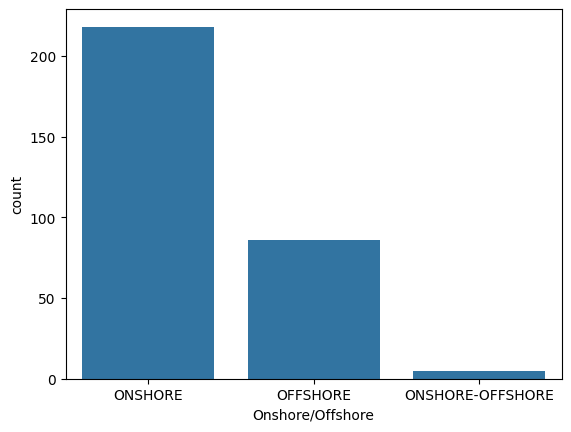

In [307]:
print("*========Информация о датасете========*\n")
print(f"1. Количество объектов: {df.shape[0]}, признаков: {df.shape[1]};\n")
print(
        f'2. Количество нулевых значений: {df.isnull().sum().sum()},'
        f' Количество не нулевых значений: {df.notnull().sum().sum()};\n'
    )
print(' 2.1 Таблица по признакам с количеством нулевых занчениями')
print('----------------')
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0].to_string())
print('----------------\n')

print('3. Статистическое описание данных\n')

print(' 3.1 Числовые данные')
display(df.describe(include='number'))

print(' 3.2 Категориальные данные')
display(df.describe(include='object'))

print(' 3.3 Распределение данных')
# Boxplot'ы 
fig = make_subplots(rows=2, cols=4, subplot_titles=("Latitude", "Longitude", "Depth", "Thickness (gross average ft)","Thickness (net pay average ft)","Porosity","Permeability"))
fig.add_trace(go.Box(x=df['Latitude'], name='Latitude'), row=1,col=1)
fig.add_trace(go.Box(x=df['Longitude'], name='Longitude'), row=1,col=2)
fig.add_trace(go.Box(x=df['Depth'], name='Depth'), row=1,col=3)
fig.add_trace(go.Box(x=df['Thickness (gross average ft)'], name='Thickness'), row=1,col=4)
fig.add_trace(go.Box(x=df['Thickness (net pay average ft)'], name='Thickness'), row=2,col=1)
fig.add_trace(go.Box(x=df['Porosity'], name='Porosity'), row=2,col=2)
fig.add_trace(go.Box(x=df['Permeability'], name='Permeability'), row=2,col=3)
fig.update_layout(height=600, width=2000, showlegend=False, title="Общий анализ данных по геологическим характеристикам", title_x=0.5)
fig.show()

print(' 3.4 Матрица корреляций')
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix=numeric_df.corr()
# Heatmap
fig_heat = go.Figure(
data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='RdBu',
    zmin=-1, zmax=1,
    text=correlation_matrix.values.round(2),
    texttemplate="%{text}",
    showscale=True
)
)
# Настройка макета
fig_heat.update_layout(
    title="Матрица корреляций",
    width=800,
    height=600
)
# Показать график
fig_heat.show()

print('4. Анализ целевой переменной')
display(df['Onshore/Offshore'].value_counts())
sns.countplot(x='Onshore/Offshore', data=df)
plt.show()


По итогу анализа стоит сделать следующие выводы:
- Целевой признак ONSHORE/OFFSHORE несбалансирован, требуется применить методы балансировки;

- В целом, матрица корреляций свидетельствует о том, что среди данных присутствуют как слабые, так и умеренные связи;

- В признаках: Latitude, Thikness (gross average ft), Thikness (net pay average ft), Depth, Permeability;

- Встречаются как многоуникальные данные: Field name, Country, Reservoir unit, Region, Basin name, Operator company, так и малоуникльные среди категориальных признаков;

- В признаках: Country - 27, Region - 38, Basin name - 38, Latitude - 27, Longitude - 30.

# 2 Предобработка данных.

In [308]:
def preprocessing(df):
    # Удаление категориальных данных с большим количеством уникальных значений
    df_tuned = df.drop(columns=['Field name','Country', 'Reservoir unit','Basin name','Operator company'])

    # Замена выбросов на медиану
    for column in df_tuned.select_dtypes(include=['float64', 'int64']).columns:
        median = df_tuned[column].median()
        df_tuned[column] = np.where(abs(df_tuned[column] - median) > 3 * df_tuned[column].std(), median, df_tuned[column])
        # Замена нулевых значений на медиану
        df_tuned[column]=df_tuned[column].fillna(median)

    # Для категориальных признаков можно использовать моду
    for column in df_tuned.select_dtypes(include=['object']).columns:
        df_tuned[column] = df_tuned[column].fillna(df_tuned[column].mode()[0])
        
    return df_tuned

df_tuned=preprocessing(df)

display(df_tuned.isnull().sum())

print(f'Итоговое количество объектов после предобработки: {df_tuned.shape[0]}')

Region                            0
Tectonic regime                   0
Latitude                          0
Longitude                         0
Onshore/Offshore                  0
Hydrocarbon type                  0
Reservoir status                  0
Structural setting                0
Depth                             0
Reservoir period                  0
Lithology                         0
Thickness (gross average ft)      0
Thickness (net pay average ft)    0
Porosity                          0
Permeability                      0
dtype: int64

Итоговое количество объектов после предобработки: 309


,Region,Tectonic regime,Latitude,Longitude,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,3.0,5.0,0.740683,0.681575,1.0,3.0,2.0,5.0,-1.378857,2.0,7.0,-0.424636,-0.766977,0.862473,-0.511388
1,4.0,18.0,-3.080594,-0.349973,1.0,3.0,6.0,15.0,-0.525710,14.0,7.0,2.760844,-0.529525,0.722798,0.025359
2,5.0,5.0,-0.608098,0.742585,1.0,3.0,8.0,5.0,-0.179343,9.0,5.0,-0.445067,0.152388,0.443446,0.125999
3,1.0,18.0,1.302673,0.156837,0.0,3.0,6.0,16.0,0.663761,9.0,7.0,-0.147119,0.858654,0.583122,0.696293
4,6.0,0.0,0.861310,-1.275854,1.0,3.0,12.0,5.0,0.755016,6.0,3.0,-0.474010,0.048883,-0.841572,1.798301


Classes distribution:
Onshore/Offshore
1.0    218
0.0     86
2.0      5
Name: count, dtype: int64
Before SMOTE: Counter({1.0: 218, 0.0: 86, 2.0: 5})
After SMOTE: Counter({1.0: 218, 0.0: 218, 2.0: 218})
(654, 14)


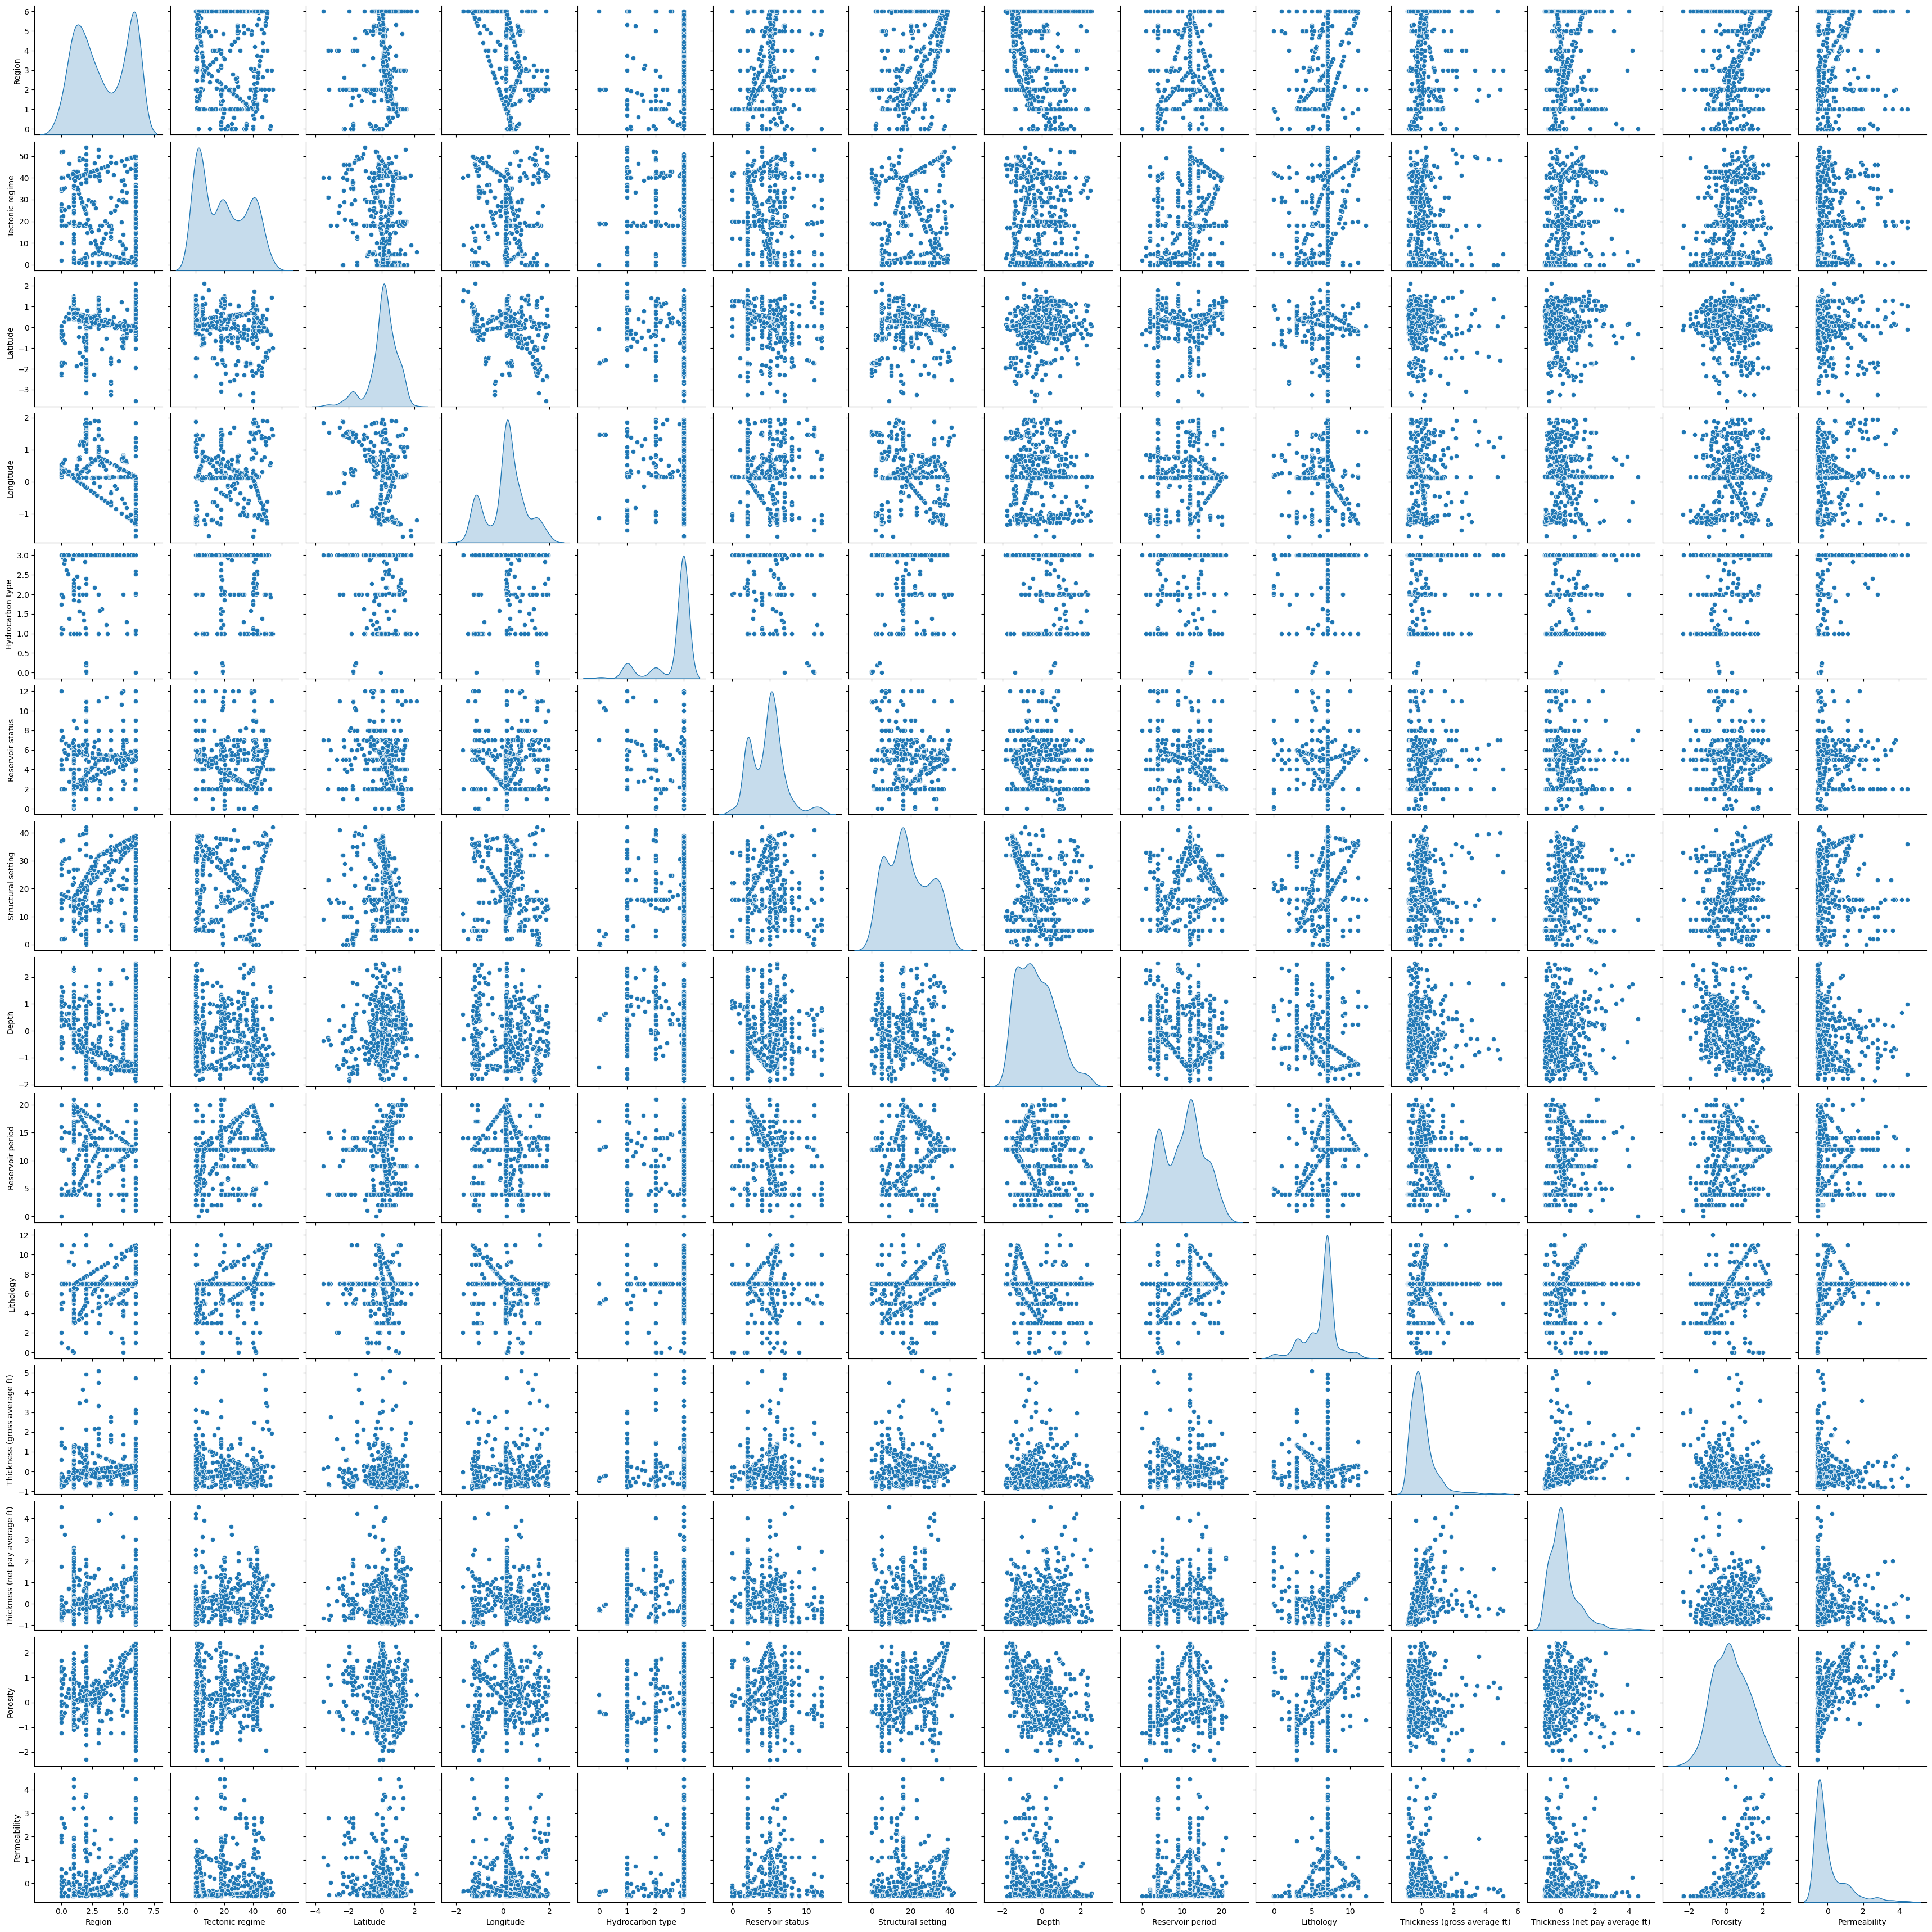

In [309]:
# Список столбцов для кодирования
columns_to_encode = ['Region','Tectonic regime', 'Structural setting', 'Reservoir period', 
                     'Onshore/Offshore','Lithology', 'Hydrocarbon type', 'Reservoir status']

# Создаем экземпляр OrdinalEncoder
encoder = OrdinalEncoder()

# Кодируем все столбцы сразу
df_tuned[columns_to_encode] = encoder.fit_transform(df_tuned[columns_to_encode])

# Стандартизируем данные
scaler = StandardScaler()
df_tuned[['Latitude', 'Longitude', 'Depth', 'Thickness (gross average ft)', 
           'Thickness (net pay average ft)', 'Porosity', 'Permeability']] = scaler.fit_transform(
    df_tuned[['Latitude', 'Longitude', 'Depth', 'Thickness (gross average ft)', 
              'Thickness (net pay average ft)', 'Porosity', 'Permeability']]
)

display(df_tuned.head())

# Разделение на признаки и целевую переменную
X=df_tuned.drop(columns=['Onshore/Offshore'])
y=df_tuned['Onshore/Offshore']
print(f'Classes distribution:\n{y.value_counts()}')

## Балансировка классов
# Проверка распределения классов до SMOTE
print("Before SMOTE:", Counter(y))

# Применение SMOTE
smote = SMOTE(random_state=0, k_neighbors=3)  # Указываем количество соседей
X_resampled, y_resampled = smote.fit_resample(X, y)

# Проверка распределения классов после SMOTE
print("After SMOTE:", Counter(y_resampled))
print(X_resampled.shape)

sns.pairplot(X_resampled, diag_kind='kde')
plt.show()

# Подбор признаков, их анализ и оценка важности.

In [310]:
corr_matrix = df_tuned.corr()
corr_heat = go.Figure(
data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='RdBu',
    zmin=-1, zmax=1,
    text=corr_matrix.values.round(2),
    texttemplate="%{text}",
    showscale=True
)
)
# Настройка макета
corr_heat.update_layout(
    title="Матрица корреляций",
    width=800,
    height=600
)
# Показать график
corr_heat.show()

# Обучение нескольких моделей, их сравнение.

In [311]:
# -----KNN------
# Разделение данных
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_resampled, y_resampled, test_size=0.32, random_state=42)

# Создаем модель KNN
knn = KNeighborsClassifier(3)

# Обучаем модель
knn.fit(X_train_knn,y_train_knn)

# предсказываем значения
y_pred = knn.predict(X_test_knn)

# F1-score (по классам и усредненный)
f1_macro_knn = f1_score(y_test_knn, y_pred, average='macro')

# Выводим результат
print(f"KNN F1 Macro: {f1_macro_knn:.4f}")


# -----Дерево решений-----
# Разделение данных
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Создаем модель Дерево решений
tree_model = DecisionTreeClassifier(random_state=42)

# Обучаем модель
tree_model.fit(X_train_tree, y_train_tree)

# Предсказания
y_pred_tree = tree_model.predict(X_test_tree)

# F1-score (по классам и усредненный)
f1_tree = f1_score(y_test_tree, y_pred_tree, average='macro')

# Выводим результат
print(f"Дерево решений F1-score: {f1_tree:.4f}")


# -----Случайный лес-----
# Разделение данных
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

# Создаем модель случайного леса
rf_model = RandomForestClassifier(random_state=42)

# Обучаем модель
rf_model.fit(X_train_rf, y_train_rf)

# Предсказания
y_pred_rf = rf_model.predict(X_test_rf)

# F1-score (по классам и усредненный)
f1_rf = f1_score(y_test_rf, y_pred_rf, average='macro')

# Выводим результат
print(f"Случайный лес F1-score: {f1_rf:.4f}")
unique_values, counts = np.unique(y_pred_rf, return_counts=True)
# Объединяем результаты в словарь или DataFrame для удобства
value_counts = dict(zip(unique_values, counts))

print(value_counts)

KNN F1 Macro: 0.8772
Дерево решений F1-score: 0.8965
Случайный лес F1-score: 0.9458
{np.float64(0.0): np.int64(68), np.float64(1.0): np.int64(81), np.float64(2.0): np.int64(67)}


# Подбор гиперпараметров.

In [312]:
# Определяем сетку параметров
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],          # Количество соседей
    'weights': ['uniform', 'distance'],   # Веса соседей
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Метрика расстояния
}

# Инициализируем модель KNN
knn = KNeighborsClassifier()

# Инициализируем GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_knn.fit(X_resampled, y_resampled)

# Выводим результаты
print('KNN')
print(10*'-')
print("Лучишие параметры:", grid_search_knn.best_params_)
print("Лучший результат:", grid_search_knn.best_score_)


# Определяем сетку параметров
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],        # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10],        # Минимальное количество образцов для разделения узла
    'min_samples_leaf': [1, 2, 4],          # Минимальное количество образцов в листовом узле
    'criterion': ['gini', 'entropy']        # Критерий разбиения
}

# Инициализируем модель дерева решений
tree_model = DecisionTreeClassifier()

# Инициализируем GridSearchCV
grid_search_tree = GridSearchCV(tree_model, param_grid_tree, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_tree.fit(X_resampled, y_resampled)

# Выводим результаты
print('\nДерево решений')
print(10*'-')
print("Лучишие параметры:", grid_search_tree.best_params_)
print("Лучший результат:", grid_search_tree.best_score_)


# Определяем сетку параметров
param_grid = {
    'n_estimators': [50, 100, 200],          # Количество деревьев в лесу
    'max_depth': [None, 10, 20, 30],        # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10],        # Минимальное количество образцов для разделения узла
    'min_samples_leaf': [1, 2, 4],          # Минимальное количество образцов в листовом узле
    'bootstrap': [True, False]              # Использование бутстрэпа
}

# Инициализируем модель случайного леса
rf_model = RandomForestClassifier()

# Инициализируем GridSearchCV
grid_search_forest = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_forest.fit(X_resampled, y_resampled)

# Выводим результаты
print('\nСлучайный лес')
print(10*'-')
print("Лучишие параметры:", grid_search_forest.best_params_)
print("Лучший результат:", grid_search_forest.best_score_)

KNN
----------
Лучишие параметры: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Лучший результат: 0.9169576805613235

Дерево решений
----------
Лучишие параметры: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Лучший результат: 0.8975652320863521

Случайный лес
----------
Лучишие параметры: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Лучший результат: 0.9465967590172142


# Выбор лучшей модели и объяснение выбора.

In [313]:
Best_model = KNeighborsClassifier(**grid_search_knn.best_params_)
Best_model.fit(X_resampled,y_resampled)

scores = cross_val_score(Best_model, X_resampled, y_resampled, cv=5, scoring='f1_macro')
print("Cross-validation F1-score:", scores.mean())

Cross-validation F1-score: 0.9169576805613235


Была выбрана модель KNN из-за ее стабильности

# Предсказание на тестовых данных.

In [314]:
oil_test=pd.read_csv('/Users/bessonv/Skillfactory/Анализ данных в Pandas/II SEM/classic ML/Проверка алгоритма ML с использованием методов балансировки классов (vo_HW)/data/oil_test.csv')

# Список столбцов для кодирования
columns_to_encode_oil = ['Region','Tectonic regime', 'Structural setting', 'Reservoir period', 
                     'Lithology', 'Hydrocarbon type', 'Reservoir status']

oil_test_tuned=preprocessing(oil_test)

# Кодируем все столбцы сразу
oil_test_tuned[columns_to_encode_oil] = encoder.fit_transform(oil_test_tuned[columns_to_encode_oil])

# Стандартизируем данные
scaler = StandardScaler()
oil_test_tuned[['Latitude', 'Longitude', 'Depth', 'Thickness (gross average ft)', 
           'Thickness (net pay average ft)', 'Porosity', 'Permeability']] = scaler.fit_transform(
    oil_test_tuned[['Latitude', 'Longitude', 'Depth', 'Thickness (gross average ft)', 
              'Thickness (net pay average ft)', 'Porosity', 'Permeability']]
)

predicted_best=Best_model.predict(oil_test_tuned)

data={'Onshore/Offshore':predicted_best}

y_predicted_best=pd.DataFrame(data)

y_predicted_best.to_csv('predicted.csv',index=True)